In [1]:
import ROOT

Module libc not found.


Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooMvn2d_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import sys
import time

In [5]:

sample_name = '6e'

input_filebase = 'bootstrap-output-test%s' % sample_name

output_filename = "bootstrap-fitting%s-output.root" % sample_name

print("  input filebase : %s" % input_filebase )
print("  output_filename : %s" % output_filename )


  input filebase : bootstrap-output-test6e
  output_filename : bootstrap-fitting6e-output.root


In [6]:
with open('%s.npy' % input_filebase,'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)
    bootstrap_weights = np.load(f)

In [7]:
nboot = len(bootstrap_weights)
nmcevts = len(train_pts)

print( "train_pts shape:  %s" % str(train_pts.shape))
print( "bootstrap_weights:  %s" % str(bootstrap_weights.shape))
print( "number of bootstraps: %d" % nboot)
print( "number of MC events: %d" % nmcevts)

train_pts shape:  (100000, 2)
bootstrap_weights:  (250, 100000)
number of bootstraps: 250
number of MC events: 100000


In [8]:
true_mean_x = 0.2
true_mean_y = 0.8
true_sigma_x = 0.9
true_sigma_y = 1.3
true_rho_xy = -0.6
true_sigma2_x = true_sigma_x * true_sigma_x
true_sigma2_y = true_sigma_y * true_sigma_y
true_cov_xy = true_rho_xy * true_sigma_x * true_sigma_y

In [9]:
x = ROOT.RooRealVar("x","x",-10.,10.)
y = ROOT.RooRealVar("y","y",-10.,10.)
mean_x = ROOT.RooRealVar("mean_x","mean_x", true_mean_x, -3., 3.)
mean_y = ROOT.RooRealVar("mean_y","mean_y", true_mean_y, -3., 3.)
sigma2_x = ROOT.RooRealVar("sigma2_x","sigma2_x", true_sigma2_x, 0.1, 9. )
sigma2_y = ROOT.RooRealVar("sigma2_y","sigma2_y", true_sigma2_y, 0.1, 9. )
cov_xy = ROOT.RooRealVar("cov_xy","cov_xy", true_cov_xy, -9., 9.)

weight = ROOT.RooRealVar("weight","weight", 0., 100. )

In [10]:
rmvn = ROOT.RooMvn2d( "rmvn", "rmvn", x, y, mean_x, mean_y, sigma2_x, sigma2_y, cov_xy )

In [11]:
fit_mean_x = np.zeros( len(bootstrap_weights) )
fit_mean_y = np.zeros( len(bootstrap_weights) )
fit_sigma2_x = np.zeros( len(bootstrap_weights) )
fit_sigma2_y = np.zeros( len(bootstrap_weights) )
fit_cov_xy = np.zeros( len(bootstrap_weights) )

fit_err_mean_x = np.zeros( len(bootstrap_weights) )
fit_err_mean_y = np.zeros( len(bootstrap_weights) )
fit_err_sigma2_x = np.zeros( len(bootstrap_weights) )
fit_err_sigma2_y = np.zeros( len(bootstrap_weights) )
fit_err_cov_xy = np.zeros( len(bootstrap_weights) )


In [12]:
%%time

for bi in range( len(bootstrap_weights)) :
#for bi in range( 3 ) :
    
    print("\n\n --- Fitting bootstrap sample %3d" % bi, flush=True )
    sys.stdout.flush()
    
    data_weighted = ROOT.RooDataSet("data_weighted","data_weighted", ROOT.RooArgSet(x,y,weight), ROOT.RooFit.WeightVar("weight"))
    
    for i in range( len(train_pts) ) :
        x.setVal(train_pts[i,0])
        y.setVal(train_pts[i,1])
        weight.setVal(bootstrap_weights[bi,i])
        data_weighted.add( ROOT.RooArgSet(x,y,weight), weight.getVal())
        
    rfr = rmvn.fitTo( data_weighted, ROOT.RooFit.SumW2Error(False), ROOT.RooFit.Save(True), ROOT.RooFit.NumCPU(25))
    
    
    fit_mean_x[bi] = mean_x.getVal()
    fit_mean_y[bi] = mean_y.getVal()
    fit_sigma2_x[bi] = sigma2_x.getVal()
    fit_sigma2_y[bi] = sigma2_y.getVal()
    fit_cov_xy[bi] = cov_xy.getVal()
    
    fit_err_mean_x[bi] = mean_x.getError()
    fit_err_mean_y[bi] = mean_y.getError()
    fit_err_sigma2_x[bi] = sigma2_x.getError()
    fit_err_sigma2_y[bi] = sigma2_y.getError()
    fit_err_cov_xy[bi] = cov_xy.getError()
    
    print("  mean_x :  %.5f +/- %.5f" % (mean_x.getVal(), mean_x.getError() ))
    
    



 --- Fitting bootstrap sample   0
  mean_x :  0.21826 +/- 0.00897


 --- Fitting bootstrap sample   1
  mean_x :  0.20339 +/- 0.00906


 --- Fitting bootstrap sample   2
  mean_x :  0.20620 +/- 0.00886


 --- Fitting bootstrap sample   3
  mean_x :  0.19746 +/- 0.00892


 --- Fitting bootstrap sample   4
  mean_x :  0.21775 +/- 0.00911


 --- Fitting bootstrap sample   5
  mean_x :  0.20968 +/- 0.00895


 --- Fitting bootstrap sample   6
  mean_x :  0.22957 +/- 0.00888


 --- Fitting bootstrap sample   7
  mean_x :  0.20661 +/- 0.00908


 --- Fitting bootstrap sample   8
  mean_x :  0.20308 +/- 0.00892


 --- Fitting bootstrap sample   9
  mean_x :  0.21640 +/- 0.00906


 --- Fitting bootstrap sample  10
  mean_x :  0.21517 +/- 0.00900


 --- Fitting bootstrap sample  11
  mean_x :  0.22451 +/- 0.00983


 --- Fitting bootstrap sample  12
  mean_x :  0.21310 +/- 0.00904


 --- Fitting bootstrap sample  13
  mean_x :  0.22624 +/- 0.00887


 --- Fitting bootstrap sample  14
  mean_x :  

  mean_x :  0.23341 +/- 0.00905


 --- Fitting bootstrap sample 121
  mean_x :  0.20604 +/- 0.00898


 --- Fitting bootstrap sample 122
  mean_x :  0.19383 +/- 0.00904


 --- Fitting bootstrap sample 123
  mean_x :  0.19644 +/- 0.00872


 --- Fitting bootstrap sample 124
  mean_x :  0.19393 +/- 0.00910


 --- Fitting bootstrap sample 125
  mean_x :  0.22238 +/- 0.00890


 --- Fitting bootstrap sample 126
  mean_x :  0.22151 +/- 0.00914


 --- Fitting bootstrap sample 127
  mean_x :  0.23194 +/- 0.00911


 --- Fitting bootstrap sample 128
  mean_x :  0.23323 +/- 0.00885


 --- Fitting bootstrap sample 129
  mean_x :  0.20896 +/- 0.00912


 --- Fitting bootstrap sample 130
  mean_x :  0.18970 +/- 0.00910


 --- Fitting bootstrap sample 131
  mean_x :  0.20731 +/- 0.00940


 --- Fitting bootstrap sample 132
  mean_x :  0.21956 +/- 0.00911


 --- Fitting bootstrap sample 133
  mean_x :  0.21505 +/- 0.00884


 --- Fitting bootstrap sample 134
  mean_x :  0.21716 +/- 0.00905


 --- Fitting b

  mean_x :  0.20898 +/- 0.00900


 --- Fitting bootstrap sample 242
  mean_x :  0.20295 +/- 0.00883


 --- Fitting bootstrap sample 243
  mean_x :  0.19930 +/- 0.00896


 --- Fitting bootstrap sample 244
  mean_x :  0.23751 +/- 0.00928


 --- Fitting bootstrap sample 245
  mean_x :  0.21146 +/- 0.00920


 --- Fitting bootstrap sample 246
  mean_x :  0.19528 +/- 0.00911


 --- Fitting bootstrap sample 247
  mean_x :  0.23275 +/- 0.00902


 --- Fitting bootstrap sample 248
  mean_x :  0.22868 +/- 0.00893


 --- Fitting bootstrap sample 249
  mean_x :  0.21139 +/- 0.00903
CPU times: user 1min 50s, sys: 1min 3s, total: 2min 53s
Wall time: 11min 16s
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x,y]) using numeric integrator RooAdaptiveIntegratorND to calculate Int(x,y)
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 25 remote server process.
 **********
 **    1 **SET PRINT       

In [13]:
cov_xy.Print()
mean_x.Print()
mean_y.Print()
sigma2_x.Print()
sigma2_y.Print()



RooRealVar::cov_xy = -0.626983 +/- 0.0107065  L(-9 - 9) 
RooRealVar::mean_x = 0.211387 +/- 0.00903363  L(-3 - 3) 
RooRealVar::mean_y = 0.752985 +/- 0.0131359  L(-3 - 3) 
RooRealVar::sigma2_x = 0.812266 +/- 0.00984414  L(0.1 - 9) 
RooRealVar::sigma2_y = 1.7173 +/- 0.0217867  L(0.1 - 9) 


In [14]:
np.sqrt(np.cov(fit_mean_x))

0.013705038982831106

In [15]:
np.sqrt(np.cov(fit_mean_y))

0.02090627202897958

In [16]:
np.mean(fit_err_mean_x)

0.009340122925300913

In [17]:
np.mean(fit_err_mean_y)

0.013567480081955246

In [18]:
np.sqrt(np.cov(fit_sigma2_x))

0.022455903084132582

In [19]:
np.mean(fit_err_sigma2_x)

0.011825821062157803

In [20]:
np.sqrt(np.cov(fit_cov_xy))

0.025056063058387236

In [21]:
np.mean(fit_err_cov_xy)

0.014286081781823555

In [22]:
for bi in range(30) :
    print( "bootstrap %3d :  mean_x = %.3f +/- %.3f  mean_y = %.3f  sigma2_x = %.3f  sigma2_y = %.3f  cov_xy = %.3f"  % 
          (bi, fit_mean_x[bi], fit_err_mean_x[bi], fit_mean_y[bi], fit_sigma2_x[bi], fit_sigma2_y[bi], fit_cov_xy[bi]) )

bootstrap   0 :  mean_x = 0.218 +/- 0.009  mean_y = 0.770  sigma2_x = 0.809  sigma2_y = 1.849  cov_xy = -0.695
bootstrap   1 :  mean_x = 0.203 +/- 0.009  mean_y = 0.799  sigma2_x = 0.821  sigma2_y = 1.770  cov_xy = -0.670
bootstrap   2 :  mean_x = 0.206 +/- 0.009  mean_y = 0.776  sigma2_x = 0.781  sigma2_y = 1.841  cov_xy = -0.659
bootstrap   3 :  mean_x = 0.197 +/- 0.009  mean_y = 0.814  sigma2_x = 0.803  sigma2_y = 1.762  cov_xy = -0.651
bootstrap   4 :  mean_x = 0.218 +/- 0.009  mean_y = 0.812  sigma2_x = 0.843  sigma2_y = 1.785  cov_xy = -0.663
bootstrap   5 :  mean_x = 0.210 +/- 0.009  mean_y = 0.822  sigma2_x = 0.807  sigma2_y = 1.801  cov_xy = -0.679
bootstrap   6 :  mean_x = 0.230 +/- 0.009  mean_y = 0.775  sigma2_x = 0.789  sigma2_y = 1.803  cov_xy = -0.649
bootstrap   7 :  mean_x = 0.207 +/- 0.009  mean_y = 0.801  sigma2_x = 0.817  sigma2_y = 1.778  cov_xy = -0.683
bootstrap   8 :  mean_x = 0.203 +/- 0.009  mean_y = 0.808  sigma2_x = 0.791  sigma2_y = 1.829  cov_xy = -0.673
b

<function matplotlib.pyplot.show(close=None, block=None)>

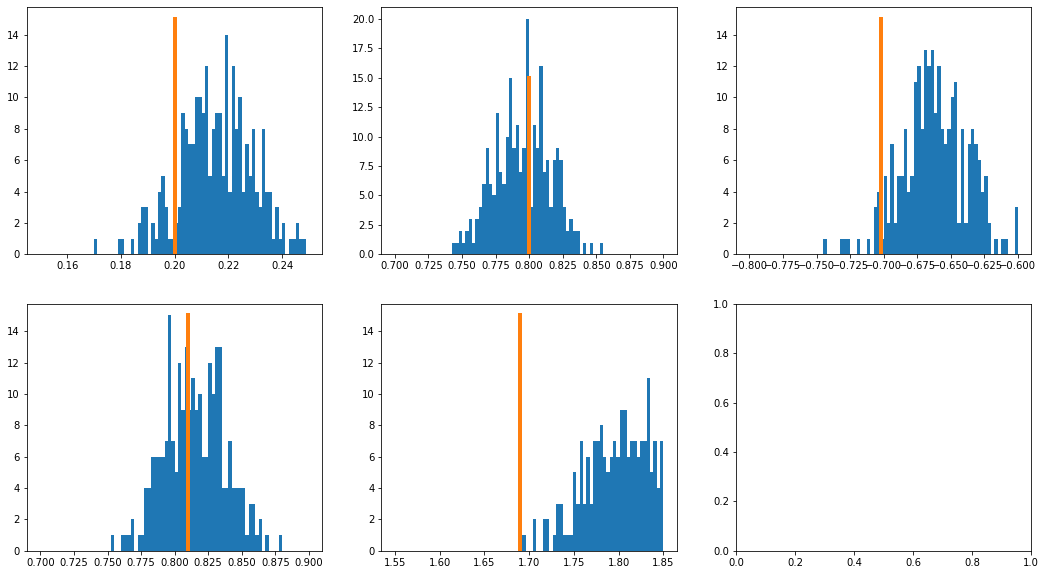

In [23]:
fig,ax = plt.subplots( 2, 3, figsize=(18,10))

hbins=80





ax[0][0].hist( fit_mean_x, bins=hbins, range=[0.15,0.25])
ax[0][1].hist( fit_mean_y, bins=hbins, range=[0.70,0.90])
ax[0][2].hist( fit_cov_xy, bins=hbins, range=[-0.80,-0.60])
ax[1][0].hist( fit_sigma2_x, bins=hbins, range=[0.70,0.90])
ax[1][1].hist( fit_sigma2_y, bins=hbins, range=[1.55,1.85])

ax[0][0].plot( [true_mean_x, true_mean_x], [0, 15], linewidth=4)
ax[0][1].plot( [true_mean_y, true_mean_y], [0, 15], linewidth=4)
ax[0][2].plot( [true_cov_xy, true_cov_xy], [0, 15], linewidth=4)
ax[1][0].plot( [true_sigma2_x, true_sigma2_x], [0, 15], linewidth=4)
ax[1][1].plot( [true_sigma2_y, true_sigma2_y], [0, 15], linewidth=4)


plt.show

[#1] INFO:InputArguments -- RooAbsData::plotOn(data_weighted) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsReal::plotOn(rmvn) plot on x integrates over variables (y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x,y]) using numeric integrator RooAdaptiveIntegratorND to calculate Int(y,x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[y]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:InputArguments -- RooAbsData::plotOn(data_weighted) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsReal::plotOn(rmvn) plot on y integrates over variables (x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(x)


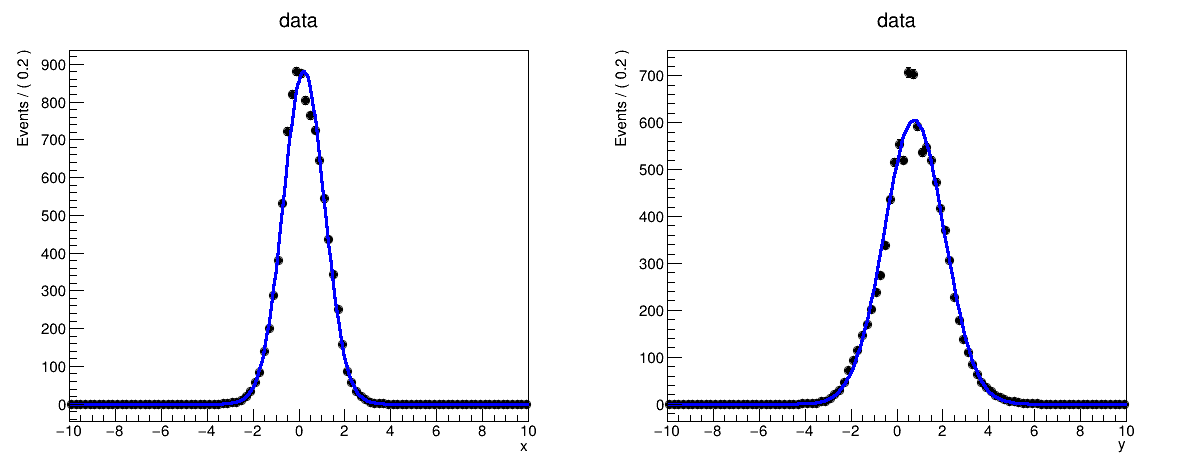

In [24]:
can = ROOT.TCanvas("can","can", 1200, 500)
can.Divide(2,1)

can.cd(1)
xframe = x.frame(ROOT.RooFit.Title("data"))
data_weighted.plotOn(xframe)
rmvn.plotOn(xframe)
xframe.Draw()
can.Draw()

can.cd(2)
yframe = y.frame(ROOT.RooFit.Title("data"))
data_weighted.plotOn(yframe)
rmvn.plotOn(yframe)
yframe.Draw()
can.Draw()


<function matplotlib.pyplot.show(close=None, block=None)>

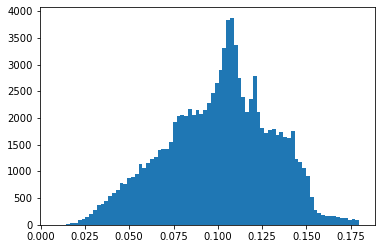

In [25]:
plt.hist(bootstrap_weights[0,:], bins=80)
plt.show

In [26]:
bootstrap_weights[0,:]

array([0.10305494, 0.09059025, 0.1688073 , ..., 0.07842199, 0.10506936,
       0.08206363])

In [27]:
len(bootstrap_weights[0,:])

100000

<function matplotlib.pyplot.show(close=None, block=None)>

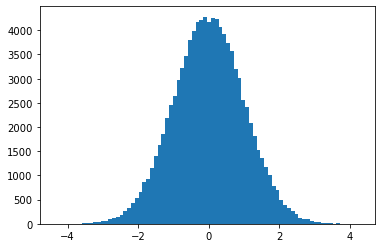

In [28]:
plt.hist( train_pts[:,0], bins=80 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

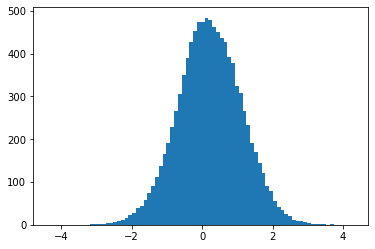

In [29]:
plt.hist( train_pts[:,0], bins=80, weights=bootstrap_weights[0,:] )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

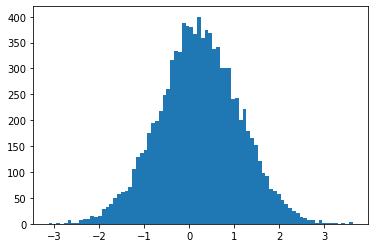

In [30]:
plt.hist( true_pts[:,0], bins=80 )
plt.show

In [31]:
tens = np.ones( len(true_pts))
tens = 10. * tens

In [32]:
tens

array([10., 10., 10., ..., 10., 10., 10.])

In [33]:
len(tens)

10000

In [34]:
len(true_pts)

10000

<function matplotlib.pyplot.show(close=None, block=None)>

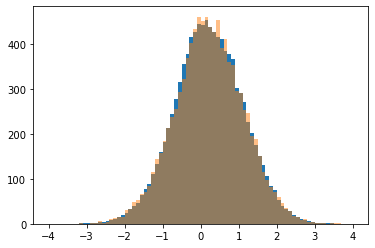

In [35]:
plt.hist( train_pts[:,0], bins=80, range=[-4,4], weights=bootstrap_weights[0,:] )
plt.hist( true_pts[:,0], bins=80, range=[-4,4],  alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

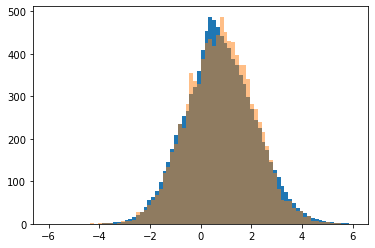

In [36]:
plt.hist( train_pts[:,1], bins=80, range=[-6.,6.], weights=bootstrap_weights[0,:] )
plt.hist( true_pts[:,1], bins=80, range=[-6.,6.],  alpha=0.5 )
plt.show

In [37]:
f0ave = np.mean( true_pts[:,0] )
f02ave = np.mean( true_pts[:,0]*true_pts[:,0] )
f0rms = np.sqrt( f02ave - f0ave*f0ave )
print(" f0rms = %.3f" % f0rms )

 f0rms = 0.897


In [38]:
np.mean( true_pts[:,0]*true_pts[:,0] )

0.8523381584052686

In [39]:
f1ave = np.mean( true_pts[:,1] )
f12ave = np.mean( true_pts[:,1]*true_pts[:,1] )
f1rms = np.sqrt( f12ave - f1ave*f1ave )
print(" f0rms = %.3f" % f1rms )

 f0rms = 1.300


In [40]:
f0rms*f0rms

0.8046374758988595

In [41]:
f1rms*f1rms

1.6904904217013534

In [42]:
fit_mean_x.shape

(250,)

In [43]:
print(" ave fit mean x : %f" % np.mean( fit_mean_x ))
print(" ave fit mean y : %f" % np.mean( fit_mean_y ))
print(" ave fit cov xy : %f" % np.mean( fit_cov_xy ))
print(" ave fit cov xx : %f" % np.mean( fit_sigma2_x ))
print(" ave fit cov yy : %f" % np.mean( fit_sigma2_y ))

 ave fit mean x : 0.215566
 ave fit mean y : 0.795062
 ave fit cov xy : -0.661464
 ave fit cov xx : 0.815130
 ave fit cov yy : 1.815664


In [44]:
ave_fit_mean_x = np.mean( fit_mean_x )
ave_fit_mean_y = np.mean( fit_mean_y )
ave_fit_cov_xy = np.mean( fit_cov_xy )
ave_fit_cov_xx = np.mean( fit_sigma2_x )
ave_fit_cov_yy = np.mean( fit_sigma2_y )




In [45]:
bi = 3

net_sum_w = 0
net_sum_wx = 0
net_sum_wy = 0
net_sum_wxy = 0
net_sum_wxx = 0
net_sum_wyy = 0

for bi in range( len(bootstrap_weights[:,0])) :
    sum_w = np.sum(bootstrap_weights[bi,:])
    sum_wx = np.sum( train_pts[:,0] * bootstrap_weights[bi,:])
    sum_wy = np.sum( train_pts[:,1] * bootstrap_weights[bi,:])
    sum_wxy = np.sum( train_pts[:,0] *train_pts[:,1] * bootstrap_weights[bi,:])
    sum_wxx = np.sum( train_pts[:,0] *train_pts[:,0] * bootstrap_weights[bi,:])
    sum_wyy = np.sum( train_pts[:,1] *train_pts[:,1] * bootstrap_weights[bi,:])
    net_sum_w = net_sum_w + sum_w
    net_sum_wx = net_sum_wx + sum_wx
    net_sum_wy = net_sum_wy + sum_wy
    net_sum_wxy = net_sum_wxy + sum_wxy
    net_sum_wxx = net_sum_wxx + sum_wxx
    net_sum_wyy = net_sum_wyy + sum_wyy

calc_mean_x = net_sum_wx / net_sum_w
calc_mean_y = net_sum_wy / net_sum_w
calc_mean_xy = net_sum_wxy / net_sum_w
calc_mean_xx = net_sum_wxx / net_sum_w
calc_mean_yy = net_sum_wyy / net_sum_w

calc_cov_xy = calc_mean_xy - calc_mean_x * calc_mean_y
calc_cov_xx = calc_mean_xx - calc_mean_x * calc_mean_x
calc_cov_yy = calc_mean_yy - calc_mean_y * calc_mean_y

print(" sum_w : %f" % net_sum_w )
print(" sum_wx : %s" % net_sum_wx )
print(" sum_wy : %s" % net_sum_wy )
print("\n\n")
print("  mean x: calc %8.5f   ave fit %8.5f" % ( calc_mean_x, ave_fit_mean_x ) )
print("  mean y: calc %8.5f   ave fit %8.5f" % (calc_mean_y, ave_fit_mean_y ) )
print("  cov xy: calc %8.5f   ave fit %8.5f" % (calc_cov_xy, ave_fit_cov_xy ) )
print("  cov xx: calc %8.5f   ave fit %8.5f" % (calc_cov_xx, ave_fit_cov_xx ) )
print("  cov yy: calc %8.5f   ave fit %8.5f" % (calc_cov_yy, ave_fit_cov_yy ) )
    
    

 sum_w : 2491849.992561
 sum_wx : 537117.8654108482
 sum_wy : 1981194.8952567359



  mean x: calc  0.21555   ave fit  0.21557
  mean y: calc  0.79507   ave fit  0.79506
  cov xy: calc -0.66160   ave fit -0.66146
  cov xx: calc  0.81533   ave fit  0.81513
  cov yy: calc  1.81610   ave fit  1.81566


## Save the output in a simple TTree

In [46]:
import uproot

In [47]:
uproot4_branches = {}

uproot4_branches[ "mean_x_fit" ] = "f4"
uproot4_branches[ "mean_y_fit" ] = "f4"
uproot4_branches[ "sigma2_x_fit" ] = "f4"
uproot4_branches[ "sigma2_y_fit" ] = "f4"
uproot4_branches[ "cov_xy_fit" ] = "f4"

uproot4_branches[ "mean_x_err" ] = "f4"
uproot4_branches[ "mean_y_err" ] = "f4"
uproot4_branches[ "sigma2_x_err" ] = "f4"
uproot4_branches[ "sigma2_y_err" ] = "f4"
uproot4_branches[ "cov_xy_err" ] = "f4"




with uproot.recreate(output_filename) as file :
    
    file.mktree( "boot_ttree", uproot4_branches, "Bootstrap fit ttree")
            
    extend_dict = {}
        
    extend_dict["mean_x_fit"] = fit_mean_x
    extend_dict["mean_y_fit"] = fit_mean_y
    extend_dict["sigma2_x_fit"] = fit_sigma2_x
    extend_dict["sigma2_y_fit"] = fit_sigma2_y
    extend_dict["cov_xy_fit"] = fit_cov_xy
        
    extend_dict["mean_x_err"] = fit_err_mean_x
    extend_dict["mean_y_err"] = fit_err_mean_y
    extend_dict["sigma2_x_err"] = fit_err_sigma2_x
    extend_dict["sigma2_y_err"] = fit_err_sigma2_y
    extend_dict["cov_xy_err"] = fit_err_cov_xy
            
    file["boot_ttree"].extend( extend_dict )
    
 
